In [3]:
#Import the libraries 

#Save our Project
import jovian
#Manipulate file
import os

# Numerical/Dataframe libraries
import pandas as pd 
import numpy as np

#Vizualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df= pd.read_csv("supermarket_sales - Sheet1.csv")

In [58]:
df.shape

(1000, 22)

In [8]:
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [9]:
df.Date = pd.to_datetime(df.Date)
#Add a month,day and weekday columns
df['month']=df.Date.dt.month
df['day']=df.Date.dt.day
df['weekday']=df.Date.dt.day_name()
#Add a hour and minute columns 
df['hour']=df.Time.str[0:2]
df['minute']=df.Time.str[3:5]
#Make it int values
df['hour']=pd.to_numeric(df['hour'])
df['minute']=pd.to_numeric(df['minute'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Payment', ylabel='count'>

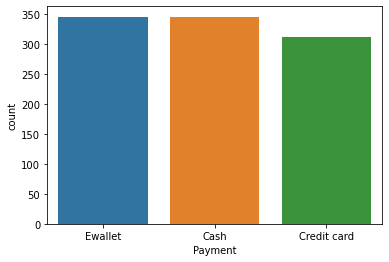

In [10]:
sns.countplot(df['Payment'])

In [13]:
pd.crosstab(df.Gender, df["Product line"], dropna=False)

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Gender,,,,,,
Female,84,96,90,64,79,88
Male,86,82,84,88,81,78


In [61]:
df.groupby("Gender")["gross income"].sum().reset_index()

,Gender,gross income
0,Female,7994.425
1,Male,7384.944


In [60]:
df.groupby("Gender")["Total"].sum().reset_index()

,Gender,Total
0,Female,167882.925
1,Male,155083.824


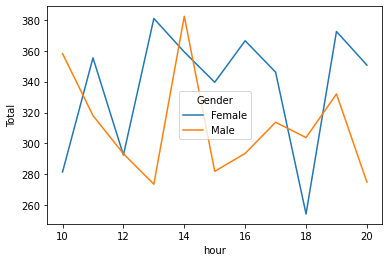

In [18]:
sns.lineplot(x="hour", y="Total", data=df,hue="Gender",ci=None)
plt.show()

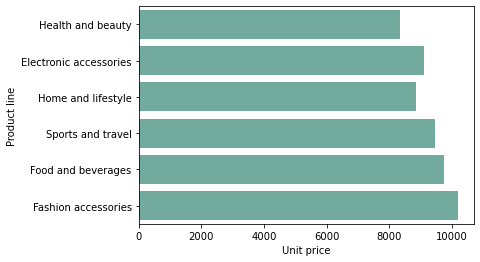

In [20]:
sns.barplot(
    x="Unit price", 
    y="Product line", 
    data=df, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2');

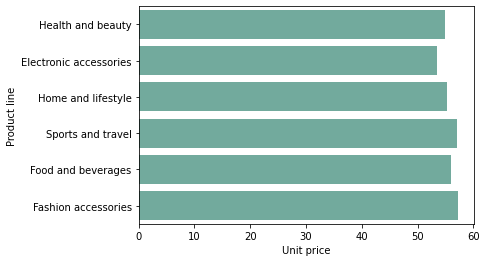

In [21]:
sns.barplot(
    x="Unit price", 
    y="Product line", 
    data=df, 
    estimator=np.mean, 
    ci=None, 
    color='#69b3a2');

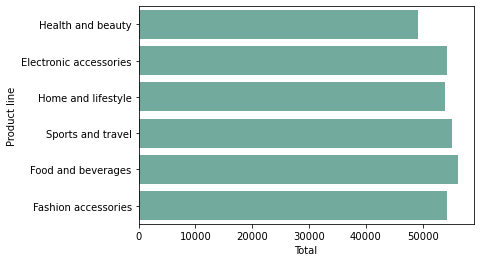

In [35]:
sns.barplot(
    x="Total", 
    y="Product line", 
    data=df, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2');

[Text(0, 0, 'Health and beauty'),
 Text(1, 0, 'Electronic accessories'),
 Text(2, 0, 'Home and lifestyle'),
 Text(3, 0, 'Sports and travel'),
 Text(4, 0, 'Food and beverages'),
 Text(5, 0, 'Fashion accessories')]

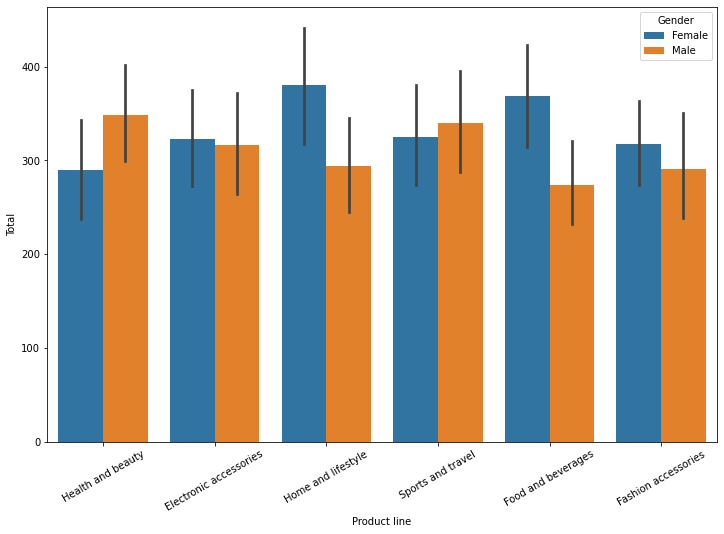

In [36]:
plt.figure(figsize = (12,8))
ax = sns.barplot(x='Product line',y='Total',hue='Gender',data=supermarket_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

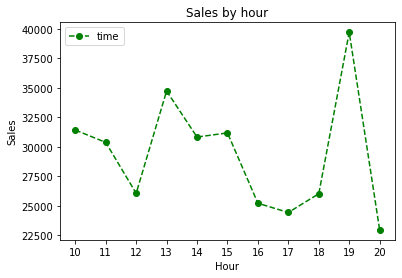

In [47]:
#Plot
sale=df.groupby('hour').sum()['Total']
hours=[hour for hour, df in df.groupby('hour')]
#Plot
plt.plot(hours,sale,'o--g')
plt.xlabel('Hour')
plt.xticks(hours)
plt.ylabel('Sales')
plt.title('Sales by hour')
plt.legend(['time'])
plt.show()

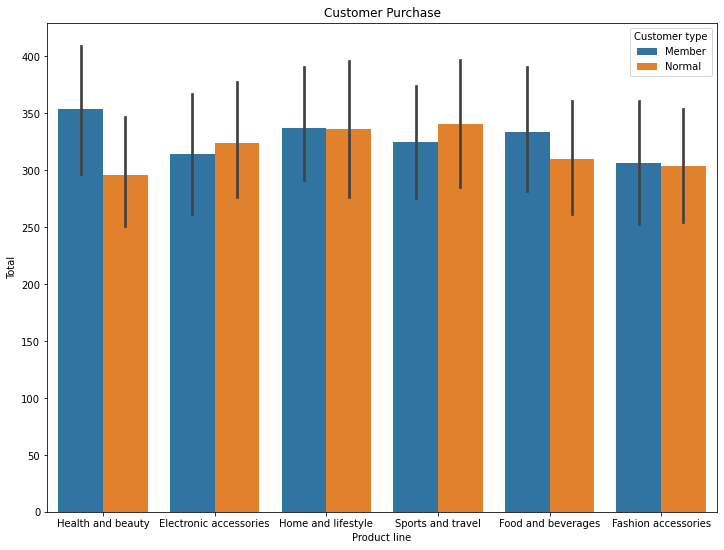

In [62]:
plt.figure(figsize=(12,9))
plt.title('Customer Purchase')
sns.barplot(x='Product line',y='Total',hue='Customer type',data=supermarket_df);

In [63]:
df["Customer type"].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64